## Gradient Decsent

Gradient descent is a simple iterative method to find local minima of a differential function. Say we have a cost function $J(x)$ we want to minimize, the update equation of gradient descent is (update $x_i$ variable):

$\begin{align}
x_i = x_i - \alpha \frac{\partial J(x) }{\partial x_i}
\end{align}$

$\alpha$ is the learning rate, and when $x_i$ stops changing within a limit we can say that the algorithm has converged. We will try to optimize :

$y = x^4-x^2$, this function has one local maxima at 0 and two local minimas at $\pm \frac{1}{\sqrt{2}}$ ($\pm 0.707$) . We will apply gradient descent to find these minimas.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, '$y=x^4-x^2$')

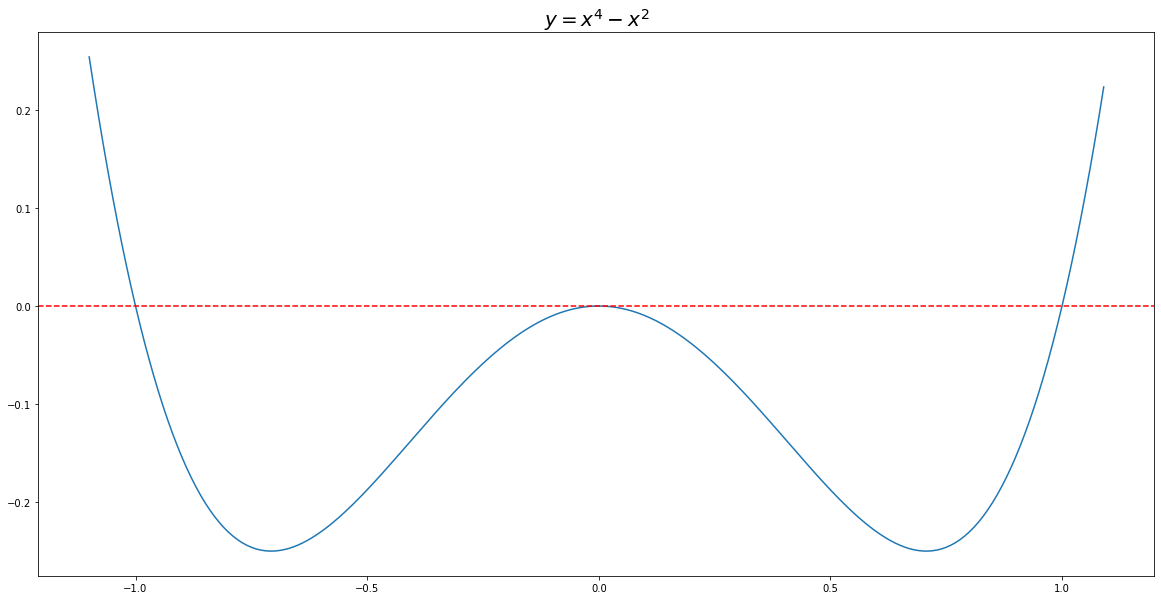

In [31]:
def func(x):
    x2 = np.square(x)
    return np.square(x2)-x2

def deriv(x):
    return 4*(x**3)-2*x

x = np.arange(-1.1, 1.1, 0.01)
y = func(x)
plt.figure(figsize=(20,10))
plt.plot(x, y)
plt.axhline(y=0, color='r', linestyle='--')
plt.title(r"$y=x^4-x^2$", fontsize=20)

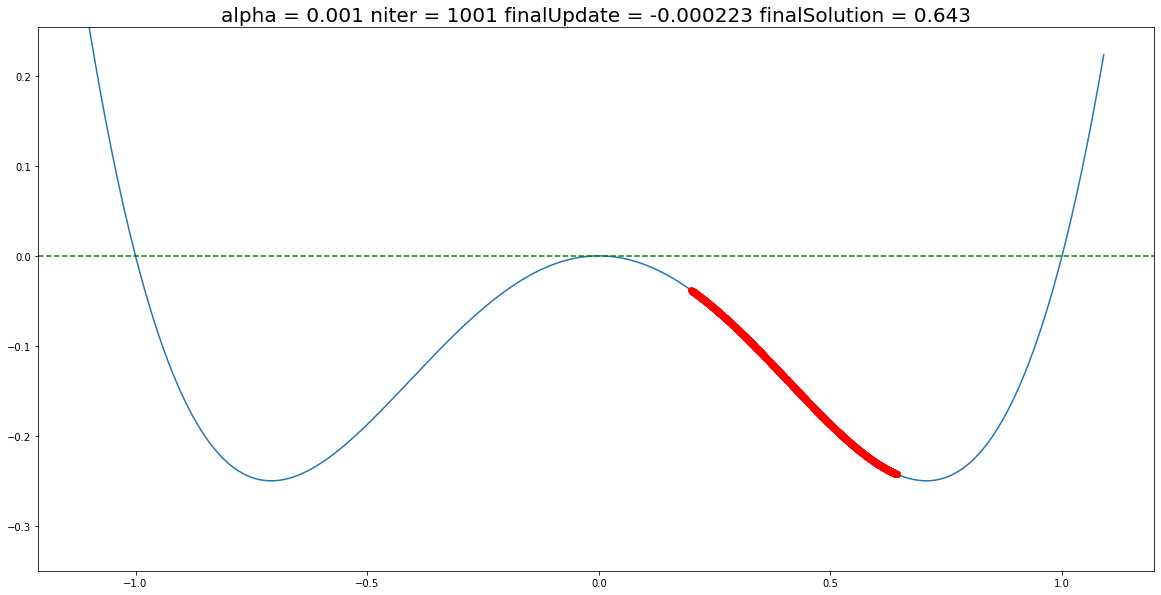

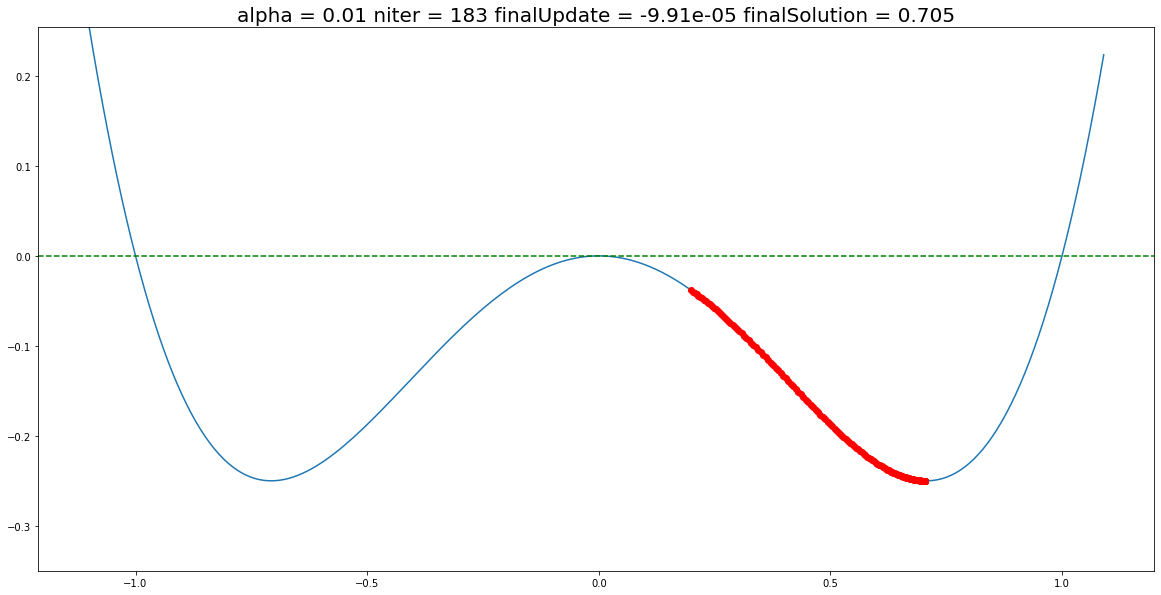

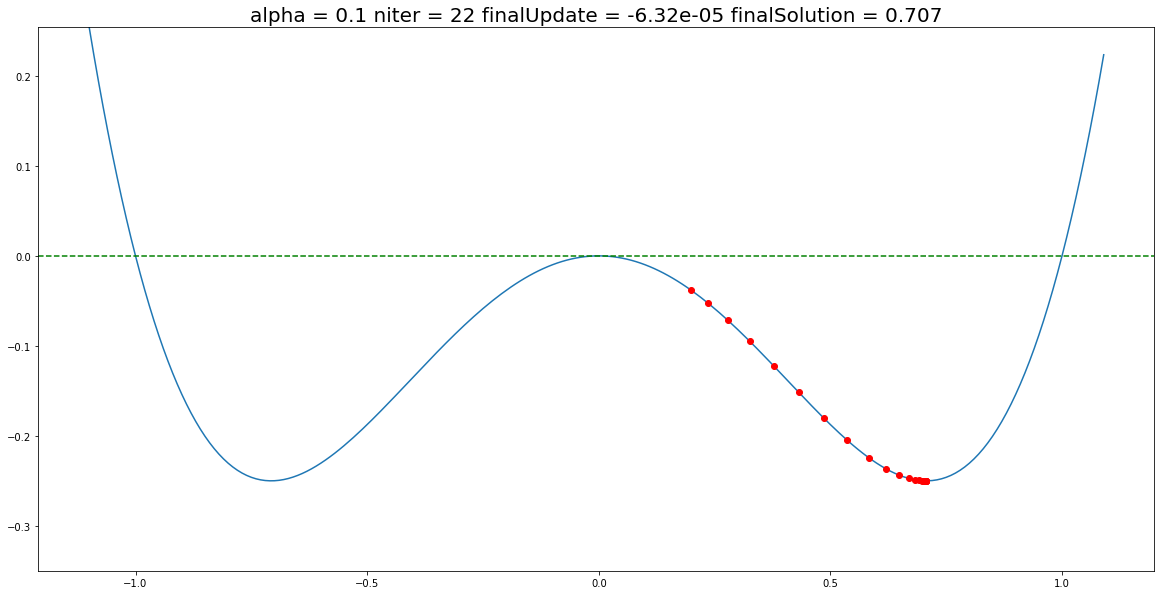

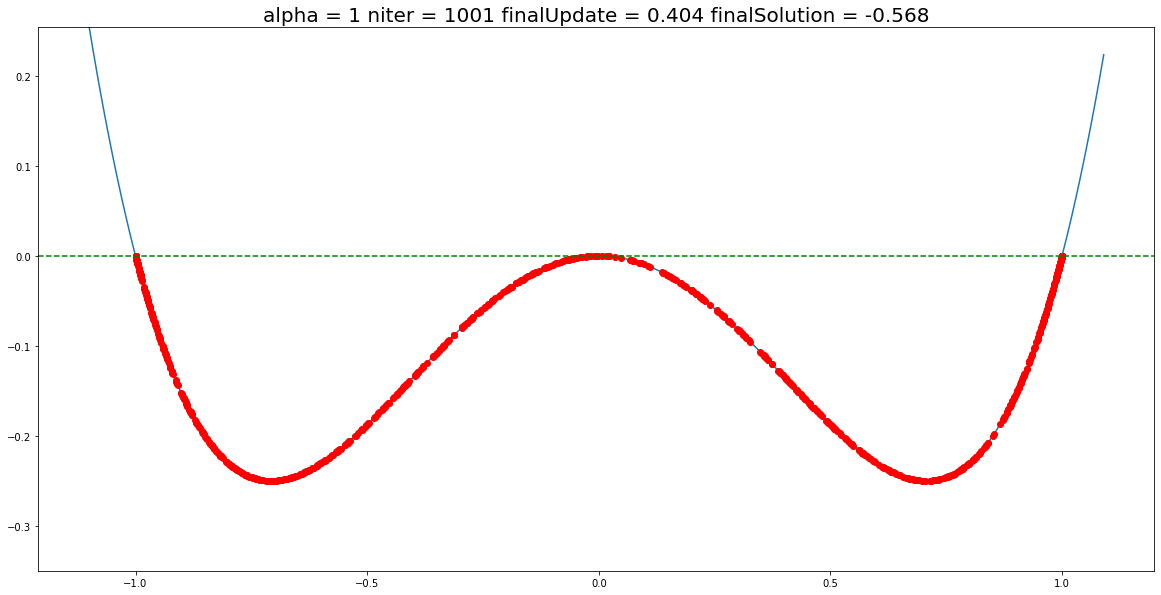

In [47]:
def solve(initialGuess, alpha, tol, maxiter, deriv):
    niter = 0
    solution = initialGuess
    solutions = [solution]
    while True:
        update = alpha * deriv(solution)
        if (abs(update) < tol) or (niter > maxiter):
            break
        solution -= update
        solutions.append(solution)
        niter += 1
    return (solutions, niter, update)

alphas = [0.001, 0.01, 0.1, 1]
for alpha in alphas:
    (solutions, niter, update) = solve(0.2, alpha, 1e-4, 1000, deriv)
    plt.figure(figsize=(20,10))
    plt.title(f'alpha = {alpha} niter = {niter} finalUpdate = {update:.3} finalSolution = {solutions[-1]:.3}', fontsize=20)
    plt.plot(x, y)
    plt.plot(solutions, func(solutions), 'ro')
    plt.ylim(np.min(y)-0.1,np.max(y))
    plt.axhline(y=0, color='g', linestyle='--')

From the above plots you can see for $\alpha = 0.001$ it never converges to a true solution, learning rate is too low. For $\alpha = 1$ it also doesnt converge but in this case it diverges.